In [16]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [33]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [34]:
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [36]:
direc = r"C:\Users\Jaswanth Kunisetty\Downloads\Dog Dataset"
Labels=[]
for files in os.listdir(direc):
    Labels+=[files]
print(Labels)

['Affenhuahua dog', 'Afgan Hound dog', 'Akita dog', 'Alaskan Malamute dog', 'American Bulldog dog', 'Auggie dog', 'Beagle dog', 'Belgian Tervuren dog', 'Bichon Frise dog', 'Bocker dog', 'Borzoi dog', 'Boxer dog', 'Bugg dog', 'Bulldog dog']


In [37]:
mapping_labels=[]
for i in range(len(Labels)):
    mapping_labels+=[i]
    
mapping=dict(zip(Labels,mapping_labels)) 
reverse_mapping=dict(zip(mapping_labels,Labels)) 

def mapper(value):
    return reverse_mapping[value]

In [38]:
training_set=[]
testing_set=[]
count=0

for file in os.listdir(direc):
    path=os.path.join(direc,file)
    t=0
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(180,180))
        image=img_to_array(image)
        image=image/255.0
        if t<=20:
            training_set+=[[image,count]]
        else:
            testing_set+=[[image,count]]
        t+=1
    count=count+1

In [39]:
train,train_labels=zip(*training_set)
test,test_labels=zip(*testing_set)

In [40]:
temp_labels=to_categorical(train_labels)
labels=np.array(temp_labels)

In [41]:
train=np.array(train)
test=np.array(test)

In [43]:
train_x,test_x,train_y,test_y=train_test_split(train,labels,test_size=0.2,random_state=44)

In [44]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(235, 180, 180, 3)
(59, 180, 180, 3)
(235, 14)
(59, 14)


In [48]:
datagenerated = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [49]:
pretrained_model = tf.keras.applications.DenseNet201(input_shape=(180,180,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model.trainable = False

In [50]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(14, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [51]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [69]:
fitted_model=model.fit(datagenerated.flow(train_x,train_y,batch_size=32),validation_data=(test_x,test_y),epochs=30)

Epoch 1/30
8/8 [==============================] - 24s 2s/step - loss: 2.9139 - accuracy: 0.1362 - val_loss: 2.7799 - val_accuracy: 0.1864
Epoch 2/30
8/8 [==============================] - 15s 2s/step - loss: 2.3140 - accuracy: 0.2681 - val_loss: 2.4964 - val_accuracy: 0.3051
Epoch 3/30
8/8 [==============================] - 15s 2s/step - loss: 1.8456 - accuracy: 0.4766 - val_loss: 2.3518 - val_accuracy: 0.3220
Epoch 4/30
8/8 [==============================] - 16s 2s/step - loss: 1.6118 - accuracy: 0.5234 - val_loss: 2.4303 - val_accuracy: 0.3390
Epoch 5/30
8/8 [==============================] - 17s 2s/step - loss: 1.5031 - accuracy: 0.5191 - val_loss: 2.2836 - val_accuracy: 0.4068
Epoch 6/30
8/8 [==============================] - 16s 2s/step - loss: 1.3049 - accuracy: 0.5702 - val_loss: 2.3475 - val_accuracy: 0.3390
Epoch 7/30
8/8 [==============================] - 16s 2s/step - loss: 1.1498 - accuracy: 0.6809 - val_loss: 2.2433 - val_accuracy: 0.4407
Epoch 8/30
8/8 [==================

In [70]:
y_pred=model.predict(test_x)
pred=np.argmax(y_pred,axis=1)
testing = np.argmax(test_y,axis=1)
print(classification_report(testing,pred))

              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       1.00      1.00      1.00         5
           2       0.00      0.00      0.00         7
           3       0.50      1.00      0.67         2
           4       0.25      0.50      0.33         4
           5       0.67      0.67      0.67         3
           6       0.60      0.75      0.67         4
           7       0.20      0.25      0.22         4
           8       0.29      0.50      0.36         4
           9       0.50      0.33      0.40         3
          10       0.80      0.57      0.67         7
          11       0.75      0.75      0.75         4
          12       0.67      0.67      0.67         3
          13       0.25      0.25      0.25         4

    accuracy                           0.49        59
   macro avg       0.49      0.53      0.49        59
weighted avg       0.48      0.49      0.47        59



In [76]:
input_image=load_img(r"C:\Users\Jaswanth Kunisetty\Downloads\Dog Dataset\Akita dog\Image_14.jpg",target_size=(180,180))

image=img_to_array(input_image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

Prediction is Akita dog.


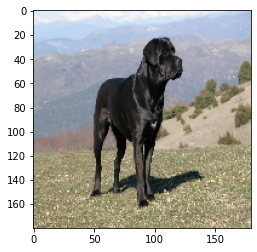

In [77]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
dog_name=mapper(value)
plt.imshow(input_image)
print("Prediction is {}.".format(dog_name))